# Intro to CIFAR10

In this section we'll be diving into TensorFlow and Artificial Neural Networks, in the first segment we'll be covering (at a high level) what Neural Networks are, how they're trained, and how TensorFlow can help. After that we will look more in more detail at Convolutional Neural Networks and Residual Neural Networks.

Throughout the session we'll be working with a dataset called CIFAR10. As you will no doubt be aware, before you start trying to apply any AI/ML the first step is to obtain and understand the dataset. How do I get it? What is the format? Does it need any preprocessing to clean or normalise it? This notebook will run through that and show you where we will (hopefully) end up.

# Exploring CIFAR10

We'll be using `CIFAR10` dataset from the [University of Toronto](https://www.cs.toronto.edu/~kriz/cifar.html). TensorFlow packages it as a part of their [datasets](https://keras.io/datasets/).

What is CIFAR10?
 - 60000 32x32 pixel colour images
 - 50000 in the training set, 10000 in the test set
 - Images are classified as one of: `['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']`
 - Randomly shuffled
 - Equal quantity of each category

Start with some standard imports:

In [4]:
%conda install matplotlib tensorflow

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/tim/opt/miniconda3/envs/training

  added / updated specs:
    - matplotlib
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.9.0              |           py37_0         164 KB
    astor-0.8.0                |           py37_0          46 KB
    c-ares-1.15.0              |    h1de35cc_1001          73 KB
    gast-0.2.2                 |           py37_0         154 KB
    google-pasta-0.2.0         |             py_0          46 KB
    grpcio-1.16.1              |   py37h044775b_1         840 KB
    h5py-2.10.0                |   

In [5]:
# Standard imports
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Then download the data:

In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

*Nice.*

As you can see it is already split into training and test sets - that saves us the trouble of doing it. There are lots of datasets and pretrained models available in TensorFlow, the majority are well set up to get going.

There is still some wrangling required. First is to reshape the labels as they come as a 2D array.

In [7]:
print("Old shape:", train_labels.shape)

# Reshape the labels.
train_labels = train_labels[:,0]
test_labels = test_labels[:,0]

print("New shape:", train_labels.shape)

Old shape: (50000, 1)
New shape: (50000,)


The neural network will perform better if we scale the pixel values to between 0 and 1, rather than 0 to 255:

In [8]:
def print_max_min(arr):
  min_val = np.min(arr)
  max_val = np.max(arr)
  print("Range = [{}, {}]".format(min_val, max_val))

In [9]:
print_max_min(train_images)

# And scale from 0 - 255 to 0.0 - 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

print_max_min(train_images)

Range = [0, 255]
Range = [0.0, 1.0]


Let's have a look at some high-res photos!

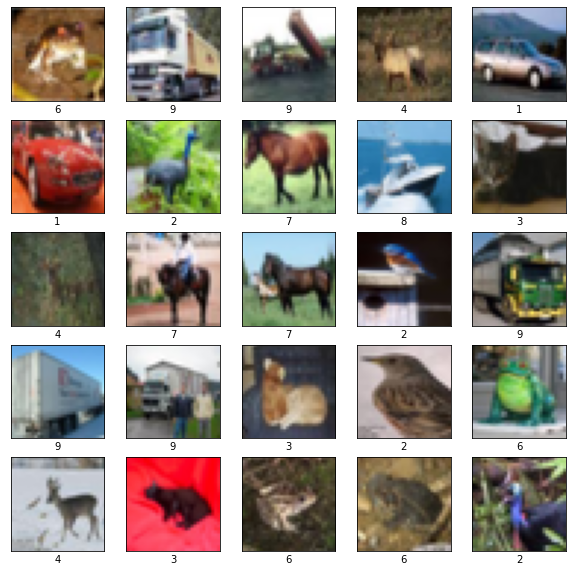

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

Hang on - that's not a `6`. That's a frog!

It is much more efficient to label the data as an integer, and that is what has been done here. The ordering of the labels from 0-9 is as follows:

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Exercise

Update the code from above to print the class name rather than number.

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Continue our evaluation

When we train our model, the order of the input data should be randomised. This can be achieved in a number of ways, in our case the order already appears to be random.

Ideally, we want a similar number of examples of each category. Lets have a look at how many samples of each category there are:

In [ ]:
label_counts = np.unique(train_labels, return_counts=True)
label_counts = np.apply_along_axis(lambda x: [class_names[x[0]], x[1]], 0, label_counts)
pd.DataFrame({'Category': label_counts[0], 'Count': label_counts[1]})

### Optional Exercise

Measure the randomness of the distirbution of classes within the dataset. (**Note**: This is actually quite difficult.)

*Cool*. Everything seems to be in order...We have a randomly shuffled, labeled dataset, that has been scaled appropriately and split into a training and test set!

## What does this have to do with machine learning?

Image recognition and classification is a great example of where machine learning excels. It is a task that us humans can easily do, but that has been extremely challenging to solve using a `computer`.

In this section you'll see how quickly you can build and train an *alright* neural network to classify these images, as well as see an example of a well designed and trained network doing the same thing.

By the end of the course you should, at a high level, understand how to build and train your own classifier.